# **Principal Components Analysis(PCA)**



### Importing Libraries

In [10]:
pip install skompiler

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install statsmodels


                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 196.9 kB/s eta 0:00:47
                                              0.1/9.2 MB 218.8 kB/s eta 0:00:42
                                              0.1/9.2 MB 218.8 kB/s eta 0:00:42
                                              0.1/9.2 MB 343.4 kB/s eta 0:00:27
                                              0.1/9.2 MB 343.4 kB/s eta 0:00:27
                                              0.1/9.2 MB 343.4 kB/s eta 0:00:27
                                              0.1/9.2 MB 293.9 kB/s eta 0:00:31
                                              0.1/9.2 MB 293.9 kB/s eta 0:00:31
    

In [24]:
pip install yellowbrick


                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
     -                                        10.2/282.6 kB ? eta -:--:--
     -                                        10.2/282.6 kB ? eta -:--:--
     -----                                 41.0/282.6 kB 281.8 kB/s eta 0:00:01
     -----                                 41.0/282.6 kB 281.8 kB/s eta 0:00:01
     --------                              61.4/282.6 kB 252.2 kB/s eta 0:00:01
     --------                              61.4/282.6 kB 252.2 kB/s eta 0:00:01
     --------                              61.4/282.6 kB 252.2 kB/s eta 0:00:01
     ------------                          92.2/282.6 kB 249.8 kB/s eta 0:00:01
     ------------------------             194.6/282.6 kB 491.5 kB/s eta 0:00:01

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
from yellowbrick.cluster import KElbowVisualizer
import time
from matplotlib.colors import ListedColormap
from skompiler import skompile
from joblib import dump, load

### Theory

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

 When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.
 
 Principal Components Analysis(PCA)refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. PCA is an unsupervised approach, since it involves only a set of features X1, X2, . . . , Xp, and no associated response Y .
 
 Suppose that we wish to visualize n observations with measurements on a set of p features, X1, X2, . . . , Xp, as part of an exploratory data analysis. We could do this by examining two-dimensional scatterplots of the data, each of which contains the n observations’ measurements on two of the features. If p is large, then it will certainly not be possible to look at all of them; moreover, most likely none of them will be informative since they each contain just a small fraction of the total information present in the data set. In particular, we would like to find a low-dimensional representation of the data that captures as much of the information as possible. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot the observations in this low-dimensional space.
 
***

There are two important outcames of PCA:

- It reduces number of dimensions in data.

- It shows which features explain the most variance in the data.

In [27]:
df = pd.read_csv("Breast_Cancer_data.csv")

In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
df.drop("Unnamed: 32",axis=1,inplace=True)
df.drop("diagnosis",axis=1,inplace=True)

In [30]:
df.shape

(569, 31)

First we need to standardize the data.

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X = scaler.fit_transform(df)

In [33]:
scaled_X

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Now, we will calculate covariance matrix.

In [34]:
covariance_matrix = np.cov(scaled_X, rowvar=False)

Now we will get Eigen Vectors and Eigen Values.

In [35]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

Now we will sort EigenVectors by Eigenvalues.

In [36]:
sorted_key = np.argsort(eigen_values)[::-1][:2]

Let's get num_components of Eigen Values and Eigen Vectors.

In [37]:
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [38]:
principal_components=np.dot(scaled_X,eigen_vectors)

In [39]:
principal_components

array([[ -9.18319983,   1.97127137],
       [ -2.38329766,  -3.75345877],
       [ -5.74247239,  -1.08035048],
       ...,
       [ -1.2518901 ,  -1.89397674],
       [-10.36503528,   1.69639755],
       [  5.47826365,  -0.67278804]])

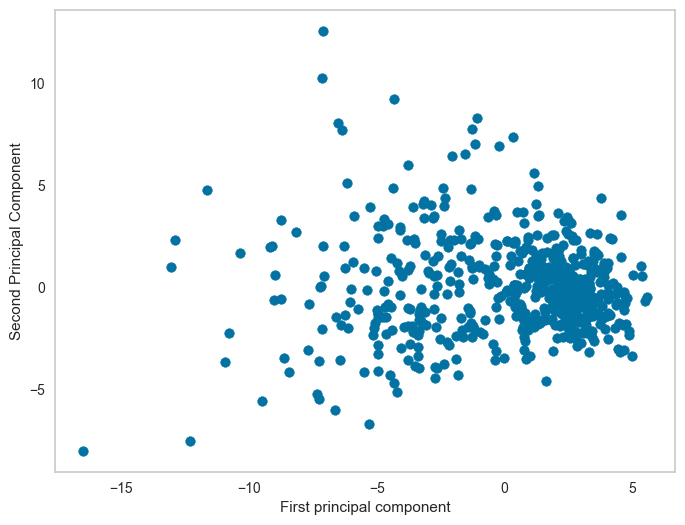

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid(False)
plt.show()

### Model

In [42]:
df = pd.read_csv("Breast_Cancer_Data.csv")

In [43]:
df.drop("Unnamed: 32",axis=1,inplace=True)
df.drop("diagnosis",axis=1,inplace=True)

In [44]:
df.shape

(569, 31)

First we need to standardize the data.

In [45]:
scaler = StandardScaler()

In [46]:
scaled_X = scaler.fit_transform(df)

In [47]:
scaled_X

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Let's execute the algorithm.

In [48]:
principal_components = PCA(n_components=2)
fitted_principal_components = principal_components.fit_transform(scaled_X)

In [49]:
component_df = pd.DataFrame(data=fitted_principal_components,columns=["First Component","Second Component"])

In [50]:
component_df.head(10)

,First Component,Second Component
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689
5,2.371151,3.964910
6,2.233527,-2.674076
7,2.151433,2.327691
8,3.165727,3.408826
9,6.354960,7.723539


Let's look how much these components explains our data.

In [51]:
principal_components.explained_variance_ratio_

array([0.42864701, 0.18376792])

In [52]:
principal_components = PCA(n_components=5)
fitted_principal_components = principal_components.fit_transform(scaled_X)

In [53]:
component_df = pd.DataFrame(data=fitted_principal_components,columns=["First Component","Second Component",
                                                                     "Third Component","Fourth Component","Fifth Component"
                                                                     ])

In [54]:
component_df.head(10)

,First Component,Second Component,Third Component,Fourth Component,Fifth Component
0,9.183200,1.971271,-1.171625,3.639332,-1.193106
1,2.383298,-3.753459,-0.580228,1.127438,0.624851
2,5.742472,-1.080350,-0.533088,0.903470,-0.180597
3,7.124384,10.272225,-3.150161,0.121512,-2.968057
4,3.945694,-1.959689,1.401177,2.937555,0.540855
5,2.371151,3.964910,-2.929342,0.925689,-1.061166
6,2.233527,-2.674076,-1.675735,0.150643,0.041701
7,2.151433,2.327691,-0.810728,-0.149408,-1.436902
8,3.165727,3.408826,-3.119277,-0.613054,-1.523496
9,6.354960,7.723539,-4.238290,-3.417143,1.696818


Let's look how much these components explains our data.

In [55]:
principal_components.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759])

In [56]:
np.sum(principal_components.explained_variance_ratio_)

0.8209816229691934

Let's try to find optimal component number.

In [57]:
principal_components = PCA().fit(scaled_X)

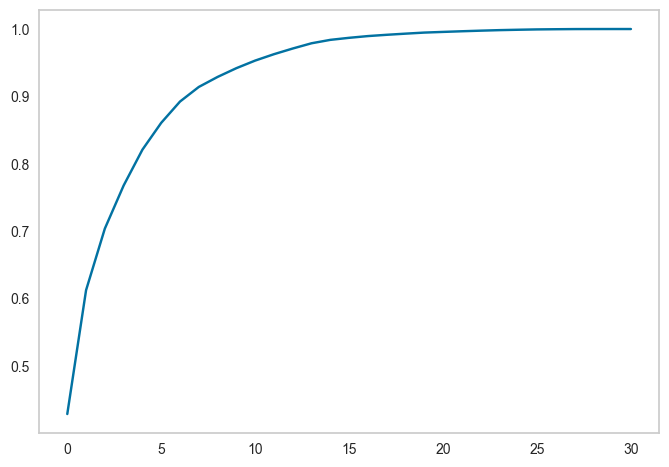

In [58]:
plt.plot(np.cumsum(principal_components.explained_variance_ratio_))
plt.grid(False)
plt.show()